In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-12-14,626.000000,627.750000,622.400024,623.650024,623.650024,15813797
1,2023-12-15,628.000000,650.000000,619.849976,648.250000,648.250000,29813572
2,2023-12-18,646.650024,655.650024,642.400024,648.500000,648.500000,16221796
3,2023-12-19,648.500000,659.599976,640.250000,655.400024,655.400024,19964008
4,2023-12-20,658.700012,660.400024,633.950012,636.450012,636.450012,22542056


In [5]:
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [6]:
df.head()

,Date,Close
0,2023-12-14,623.650024
1,2023-12-15,648.250000
2,2023-12-18,648.500000
3,2023-12-19,655.400024
4,2023-12-20,636.450012


In [19]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
plt.plot(df['Date'], df['Close'])
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [26]:
n = len(df)
t = np.arange(1, n+1)

p = 5
print(n)
print(p)

61
5


In [28]:
X = df['Close'].to_numpy().reshape(n,1)

# Construct the Vandermonde matrix H
H = np.zeros((n, p))
H[:, 0] = 1
for i in range(1, p):
  H[:, i] = t ** i

# Estimate parameters θ̂ = (HᵀH)⁻¹HᵀX using least squares
theta_cap, residuals, rank, s = np.linalg.lstsq(H, X, rcond=None)

print("Parameters of the estimated polynomial model:")
print(theta_cap.flatten())

Parameters of the estimated polynomial model:
[ 6.27595612e+02  7.29224331e+00 -7.96033582e-01  2.58146963e-02
 -2.33098967e-04]


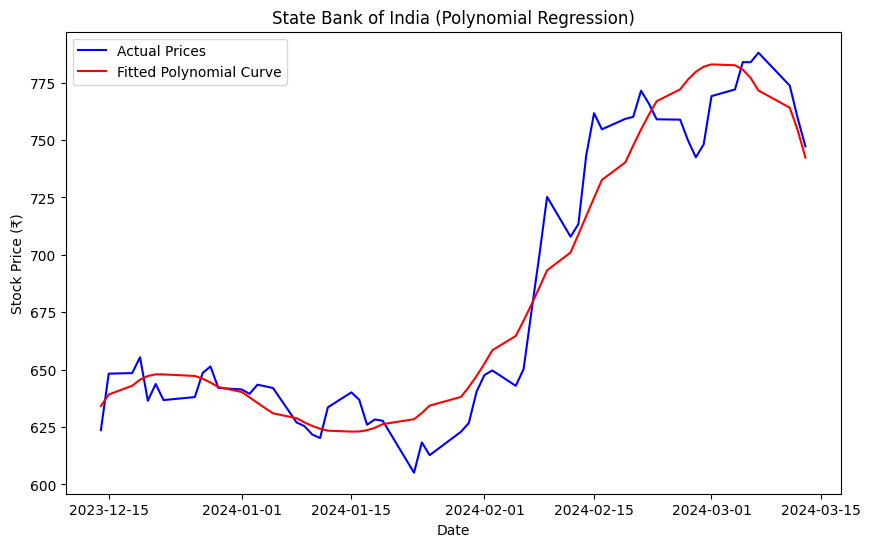

KeyboardInterrupt: Interrupted by user

In [29]:
# Predicted fitted curve
m = np.zeros(n)
for i in range(p):
    m += theta_cap[i] * (t ** i)

# Plot actual vs fitted curve
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='blue')
plt.plot(df['Date'], m, label='Fitted Polynomial Curve', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price (₹)')
plt.title('State Bank of India (Polynomial Regression)')
plt.legend()
plt.show()

# --- Prediction for a future day ---
day = int(input("Enter predicting day (e.g., 1000 for 1000th record): "))
predicted_stock_value = 0
for i in range(p):
    predicted_stock_value += theta_cap[i] * (day ** i)

print(f"\nPredicted Stock Value for day {day}: ₹{predicted_stock_value[0]:.2f}")

# Example inaccuracy (if comparing to actual known price)
# actual_price = 579.56  # example
# inaccuracy = predicted_stock_value[0] - actual_price
# print(f"Inaccuracy in predicted value: {inaccuracy:.2f}")